<a href="https://colab.research.google.com/github/EmmaCOo/Assignment-3.1-Group-Comparison/blob/main/ADS509_Assignment_3_1_Group_Comparison_Emma_Oo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**ADS 509 Module 3: Group Comparison**

###**Emma Oo**

###09/19/2022

Assignment Instruction Template Link: 

https://github.com/37chandler/ads-tm-group-comp/blob/main/Group%20Comparison.ipynb




The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

For this assignment, I will be usign the  'M1 Assignment Data.zip.'

Specifically, you are asked to do the following:

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set.

* Calculate descriptive statistics on the two sets of lyrics and compare the results.

* For each of the four corpora, find the words that are unique to that corpus.

* Build word clouds for all four corpora.

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization).



In [ ]:
!pip install emoji==1.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 4.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=c094a6e8c99f6033fbf1d6ce0373c42be20642c936bf627e227c84bbc14e6f4e
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
#import libraries
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [ ]:
# Use this space for any additional import statements you need
import nltk
nltk.download('stopwords')
import numpy as np
from math import nan, isnan

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
#sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.UNICODE_EMOJI : 
    for em in emoji.UNICODE_EMOJI[country] : 
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """

    # Place your Module 2 solution here
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = len(set(tokens)) / len(tokens) 
    num_characters = sum([len(token) for token in tokens])

    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print(Counter(tokens).most_common(5))

        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    
    return(0)

def is_emoji(s):
    return(s in all_language_emojis)

def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if is_emoji(ch)]

    return(len(emojis) > 0)

#Remove Stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))
def remove_stop(tokens) :
  return[t for t in tokens if t not in stopwords]

#Remove Punctuation
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))


#Tokenization while keeping # and emojis
RE_TOKEN = re.compile(r"""
                   ( [#]?[@\w'’\.\-\:]*\w     # words, hashtags and email addresses
                   | [:;<]\-?[\)\(3]          # coarse pattern for basic text emojis
                   | [\U0001F100-\U0001FFFF]  # coarse code range for unicode emojis
                   )
                  """, re.VERBOSE)
def tokenize(text) : 
  return text.split()

#Define pipeline function
pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]
def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


###**Data Ingestion**

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

###**Lyrics Data Ingestion**

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "Uploading_Data_Colab_1.xlsx" with length 9000 bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving M1 Assignment Data.zip to M1 Assignment Data.zip
User uploaded file "Uploading_Data_Colab_1.xlsx" with length 9000 bytes


In [1]:
#unzip the folders and files
#!unzip /content/M1AssignmentData.zip

In [ ]:
# change `data_location` to the location of the folder on your machine.
data_location = "/content/M1 Results"

#Artists' Folders
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

#artists' files for TWITTER data
artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}

###**TWITTER DATA INGESTION**

In [ ]:
#CHER
twitter_data = pd.read_csv(data_location +'/'+ twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

#add artist columns 'cher' to separate 'cher' twitter data from 'robyn'
twitter_data['artist'] = "cher" 

In [ ]:
#ROBYN
twitter_data_2 = pd.read_csv(data_location +'/'+ twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([twitter_data,twitter_data_2])
    
del(twitter_data_2)

###**LYRICS DATA INGESTION**

In [ ]:
#lyrics Paths
artist = ['cher','robyn']

#lyrics folder path
lyrics_path = data_location+'/'+lyrics_folder

#artist folder path under lyrics folder
artist_path = os.listdir(lyrics_path)

artist_names = []  #to append the artist names
song_names = []  # to append the song names
lyrics = []  # to append the lyrics


for artist in artist_path:
  artist_folder = lyrics_path + artist  # specify each artist folder path such as 'path/lyrics/robyn' and 'path/lyrics/cher'
  songs = os.listdir(artist_folder)  # list each artist's songs

  for i in songs:
    song_path = artist_folder + '/' + i
    with open(song_path) as infile:
      location = infile.readlines()

    artist_names.append(artist)  # listing artist's name
    song_names.append(location[0])
    lyrics.append(''.join(location[1:]))

In [ ]:
# Lyrics data frame
data = {'Artist': artist_names, 'Song_Names': song_names, 'lyrics': lyrics} 

lyrics_data = pd.DataFrame(data)
lyrics_data.head(2)

,Artist,Song_Names,lyrics
0,robyn,"""Missing U""\n","\n\n\nBaby, it's so weird to me now that it's ..."
1,robyn,"""Moonlight""\n","\n\n\nOh baby no, don't you go, let them wait\..."


In [ ]:
#Remove new lines \n from messy strings from the data frame
lyrics_data = lyrics_data.replace(r'\n',' ', regex=True) 
lyrics_data.head(2)

,Artist,Song_Names,lyrics
0,robyn,"""Missing U""","Baby, it's so weird to me now that it's ove..."
1,robyn,"""Moonlight""","Oh baby no, don't you go, let them wait Oh ..."


###**Tokenization and Normalization**

In this next section, tokenize and normalize your data. We recommend the following cleaning.

Lyrics

* Remove song titles
* Casefold to lowercase
* Remove punctuation
* Split on whitespace
* Remove stopwords (optional)

**Remove stopwords will be performed for this assignment.**

In [ ]:
#Define pipeline functions
my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

#tokenize and normalize on lyrics data
lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) 

#tokenize and normalize on Twitter data
twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 

In [ ]:
#Add emoji column wherether the description contain emoji or not
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)
twitter_data.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist,tokens,num_tokens,has_emoji
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher,[nan],1,False
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]",6,False
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]",3,True
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher,[csu],1,False
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher,"[writer, washinformer, spelmancollege, alumna,...",17,False


With the data processed, we can now start work on the assignment questions.

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

**A:  After thoroughly looking at the tokens, it's noted that some emojis are not split separately from the text. We can split all the emojis into one column to get clear understanding of pure text and emjois.** 

Calculate descriptive statistics on the two sets of lyrics and compare the results.

###**DESCRIPTIVE STATISTICS FOR LYRICS DATA SET**


In [ ]:
#CREATE CHER AND ROBYN DATASETS
 
#For lyrics dataset
cher_lyrics = lyrics_data[lyrics_data['Artist'] == 'cher']
robyn_lyrics = lyrics_data[lyrics_data['Artist'] == 'robyn']

#for Twitter dataset
cher_twitter = twitter_data[twitter_data['artist'] == 'cher']
robyn_twitter = twitter_data[twitter_data['artist'] == 'robyn']

In [ ]:
#TOKEN COUNTS FOR ALL 

#CHER-TWITTER
cher_twit_tokens = []
for i in cher_twitter['tokens']:
  cher_twit_tokens.extend(i)

#ROBYN-TWITTER
robyn_twit_tokens = []
for i in robyn_twitter['tokens']:
  robyn_twit_tokens.extend(i)

#CHER-LYRICS
cher_tokens = []
for i in cher_lyrics['tokens']:
  cher_tokens.extend(i)

print('Descriptive Stats of Cher:')
descriptive_stats(cher_tokens)

print('\n')

#ROBYN-LYRICS
robyn_tokens = []
for i in robyn_lyrics['tokens']:
  robyn_tokens.extend(i)

print('Descriptive Stats of Robyn:')
descriptive_stats(robyn_tokens)

Descriptive Stats of Cher:
There are 35233 tokens in the data.
There are 3684 unique tokens in the data.
There are 169244 characters in the data.
The lexical diversity is 0.105 in the data.
[('love', 966), ('im', 511), ('know', 480), ('dont', 430), ('youre', 332)]


Descriptive Stats of Robyn:
There are 15041 tokens in the data.
There are 2139 unique tokens in the data.
There are 72804 characters in the data.
The lexical diversity is 0.142 in the data.
[('know', 305), ('im', 299), ('dont', 297), ('love', 269), ('got', 249)]


[15041, 2139, 0.1422112891430091, 72804]

Q: what observations do you make about these data?

**A:  Cher's lyrics are longer than Robyn's due to the descriptive stats.  The lexical diversity in Cher is lower than Robyn's and they both share some top tokens.**

###**Find tokens uniquely related to a corpus**

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis.

To avoid these problems, we will create **a custom statistic** to identify words that are uniquely related to each corpus. **The idea is to find words that occur often in one corpus and infrequently in the other(s).**

Since corpora can be of different lengths, we will focus on the **concentration of tokens within a corpus."Concentration" is simply the count of the token divided by the total corpus length.** For instance, if a corpus had length 100,000 and a word appeared 1,000(frequency) times, then the concentration would be 1,000/100,000 = 0.01. If the same token had a concentration of 0.005  in another corpus, then the **concentration ratio** would be 0.01/0.005 = 2 
 
Very rare words can easily create infinite **ratios**, so you will also add a cutoff to your code so that a token must appear at least n  times for you to return it.

In this section find 10 tokens for each of your four corpora that meet the following criteria:

1) The token appears at least n times in all corpora

2) The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, n=5 seems to perform reasonably well.

###**1) The token appears at least n times in all corpora**

Strategy:  

1) Create a data frame by combining all token columns from Lyrics and Twitter files. 

2) Find the frequency (counts) of each token and filter only the tokens that appear more than n=5 times in the all corpora. 

In [ ]:
cher_lyrics.head()

,Artist,Song_Names,lyrics,tokens,num_tokens
104,cher,"""I Saw A Man And He Danced With His Wife""",I was by myself drinkin' Chilled lonely win...,"[drinkin, chilled, lonely, wine, walked, woman...",83
105,cher,"""My Love""",I heard you wanna be somebody But you're al...,"[heard, wanna, somebody, youre, already, shini...",113
106,cher,"""Masters Of War""",Come you masters of war You that build all ...,"[come, masters, war, build, guns, build, death...",168
107,cher,"""When Lovers Become Strangers""",You're looking at him from across the room ...,"[youre, looking, across, room, wondering, slip...",157
108,cher,"""Hard Enough Getting Over You""","For the first time, in such a long time I'v...","[first, time, long, time, ive, feeling, theres...",133


###Let's create the corpora dataset with each token and respecitve counts seen in all corpora. 

In [ ]:
#CREATE WORDCOUNT DATA FRAME
cher_counts = Counter(cher_tokens)
cher_df = pd.DataFrame(cher_counts.most_common())
cher_df.columns = ['tokens', 'cher_counts']
cher_df.head()

,tokens,cher_counts
0,love,966
1,im,511
2,know,480
3,dont,430
4,youre,332


### Create the wordcount dataframe for the rest of the corpora. 

In [ ]:
#Robyn's wordcounts for Lyrics data
robyn_counts = Counter(robyn_tokens)
robyn_df = pd.DataFrame(robyn_counts.most_common())
robyn_df.columns = ['tokens', 'robyn_counts']

#Cher's wordcounts for Twitter
cher_twit_counts = Counter(cher_twit_tokens)
cher_twit_df = pd.DataFrame(cher_twit_counts.most_common())
cher_twit_df.columns = ['tokens', 'cher_twit_counts']

#Robyn's wordcounts for Twitter
robyn_twit_counts = Counter(robyn_twit_tokens)
robyn_twit_df = pd.DataFrame(robyn_twit_counts.most_common())
robyn_twit_df.columns = ['tokens', 'robyn_twit_counts']

In [ ]:
#drop nan from all tokens from corpora
clean_cher = cher_df.dropna(axis=0)
clean_robyn = robyn_df.dropna(axis=0)
clean_cher_twit = cher_twit_df.dropna(axis=0)
clean_robyn_twit = robyn_twit_df.dropna(axis=0)

In [ ]:
#combine all counts and save under the 'corpora' dataframe
comb_df = pd.merge(clean_cher, clean_robyn,how = 'outer', on ='tokens')
comb_df_2 = pd.merge(clean_cher_twit, clean_robyn_twit, how = 'outer', on = 'tokens')

corpora = pd.merge(comb_df, comb_df_2, how = 'outer', on = 'tokens')

In [ ]:
corpora.head(3)

,tokens,cher_counts,robyn_counts,cher_twit_counts,robyn_twit_counts
0,love,966.0,269.0,213522.0,11615.0
1,im,511.0,299.0,139051.0,9049.0
2,know,480.0,305.0,26857.0,1867.0


In [ ]:
#Add total_counts (total frequency) for each token
total_counts = [token for token in list(corpora.columns) if token!='token']
corpora['total_counts'] = corpora[total_counts].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
corpora.head(3)

,tokens,cher_counts,robyn_counts,cher_twit_counts,robyn_twit_counts,total_counts
0,love,966.0,269.0,213522.0,11615.0,226372.0
1,im,511.0,299.0,139051.0,9049.0,148910.0
2,know,480.0,305.0,26857.0,1867.0,29509.0


###The final corpora named 'n_times_corpora' contain only the tokens that appear more than 5 times in all corpora. 

In [ ]:
n_times_corpora = (corpora[(corpora[['cher_counts', 'robyn_counts','cher_twit_counts','robyn_twit_counts']]>5).all(axis=1)])
n_times_corpora.head(3)

,tokens,cher_counts,robyn_counts,cher_twit_counts,robyn_twit_counts,total_counts
0,love,966.0,269.0,213522.0,11615.0,226372.0
1,im,511.0,299.0,139051.0,9049.0,148910.0
2,know,480.0,305.0,26857.0,1867.0,29509.0


###**2) The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.**

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, n=5 seems to perform reasonably well.



###To get the top 10 with highest ratio of appearance in given corpora:

1) The approach is to get the ratio by diving the counts of token in corpus_1 by the total counts of token.

Sample calculation for 'love' token from the above table, 

ratio of 'love' for cher_counts corpora = 966 (counts in cher_counts)/ 226372 (total_counts)



In [ ]:
top_df = n_times_corpora[['tokens']]
top_df['cher_ratio'] = n_times_corpora['cher_counts'] / (n_times_corpora['total_counts'])
top_df['robyn_ratio'] = n_times_corpora['robyn_counts'] / (n_times_corpora['total_counts'])
top_df['cher_twit_ratio'] = n_times_corpora['cher_twit_counts'] / (n_times_corpora['total_counts'])
top_df['robyn_twit_ratio'] = n_times_corpora['robyn_twit_counts'] / (n_times_corpora['total_counts'])
top_df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,tokens,cher_ratio,robyn_ratio,cher_twit_ratio,robyn_twit_ratio
0,love,0.004267,0.001188,0.943235,0.051309
1,im,0.003432,0.002008,0.933792,0.060768
2,know,0.016266,0.010336,0.910129,0.063269
3,dont,0.010205,0.007048,0.917839,0.064907
4,youre,0.044528,0.022666,0.847505,0.085300


###**Top 10 with highest ratio of appearance in Lyrics-Cher corpora**

In [ ]:
top_cher = top_df[['tokens','cher_ratio']]
top_cher = top_cher.sort_values(by=['cher_ratio'], ascending=False)
top_cher.head(10)

,tokens,cher_ratio
104,ooh,0.304569
100,chorus,0.252101
108,tonight,0.108856
517,ohh,0.091603
902,ooo,0.089552
17,gonna,0.056039
704,deny,0.054422
53,gotta,0.053850
302,weve,0.053419
132,knew,0.050580


###**Top 10 with highest ratio of appearance in Lyrics-Robyn corpora**

In [ ]:
top_robyn = top_df[['tokens','robyn_ratio']]
top_robyn = top_robyn.sort_values(by=['robyn_ratio'], ascending=False)
top_robyn.head(10)

,tokens,robyn_ratio
100,chorus,0.239496
902,ooo,0.089552
517,ohh,0.083969
401,beat,0.073733
104,ooh,0.065990
704,deny,0.061224
791,itll,0.056522
590,alright,0.044118
887,shake,0.038544
60,gone,0.037239


###**Top 10 with highest ratio of appearance in TWitter-Cher corpora**

In [ ]:
top_cher_twit = top_df[['tokens','cher_twit_ratio']]
top_cher_twit = top_cher_twit.sort_values(by=['cher_twit_ratio'], ascending=False)
top_cher_twit.head(10)

,tokens,cher_twit_ratio
238,god,0.964083
646,proud,0.962040
782,faith,0.957755
262,friend,0.957029
129,woman,0.956532
261,truth,0.954323
242,stand,0.951555
159,boys,0.948197
170,two,0.947236
348,mama,0.947033


###**Top 10 with highest ratio of appearance in Twitter-Robyn corpora**

In [ ]:
top_robyn_twit = top_df[['tokens','robyn_twit_ratio']]
top_robyn_twit = top_robyn_twit.sort_values(by=['robyn_twit_ratio'], ascending=False)
top_robyn_twit.head(10)

,tokens,robyn_twit_ratio
117,till,0.394994
320,til,0.285274
248,sound,0.202312
227,music,0.146165
344,head,0.135110
299,dance,0.132611
394,lights,0.128000
401,beat,0.123400
654,listen,0.118477
30,night,0.116754


###**Build word clouds for all four corpora.**

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found here. If you haven't already, you should absolutely clone the repository that accompanies the book.



In [ ]:
# Define function to create wordcloud:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

        
   # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

###**Word Cloud for Lyrics-Cher**

Text(0.5, 1.0, 'Cher Lyrics WordCloud')

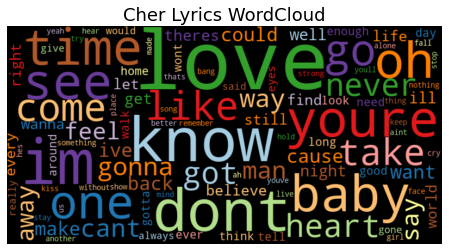

In [ ]:
plt.figure(figsize=(8,4))
cher_wd = count_words(lyrics_data[lyrics_data['Artist']=='cher'])
wordcloud(cher_wd['freq'], max_words=100)
plt.title('Cher Lyrics WordCloud', size = 18)

###**Word Cloud for Lyrics-Robyn**

Text(0.5, 1.0, 'Robyn Lyrics WordCloud')

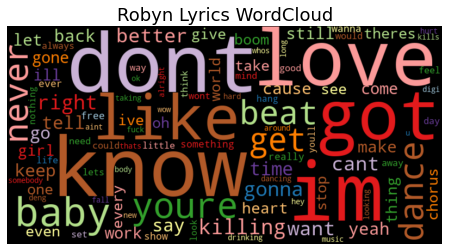

In [ ]:
plt.figure(figsize=(8,4))
robyn_wd = count_words(lyrics_data[lyrics_data['Artist']=='robyn'])
wordcloud(robyn_wd['freq'], max_words=100)
plt.title('Robyn Lyrics WordCloud', size = 18)

###**Word Cloud for Twitter-Cher**

Text(0.5, 1.0, 'Cher Twitter WordCloud')

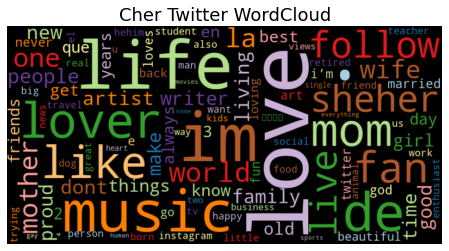

In [ ]:
plt.figure(figsize=(8,4))
clean_twit_data = twitter_data.dropna(axis=0)   #drop nan values from the Twitter dataframe
cher_twit_wd = count_words(clean_twit_data[clean_twit_data['artist']=='cher'])
wordcloud(cher_twit_wd['freq'], max_words=100)
plt.title('Cher Twitter WordCloud', size = 18)

###**Word Cloud for Twitter-Robyn**

Text(0.5, 1.0, 'Robyn Twitter WordCloud')

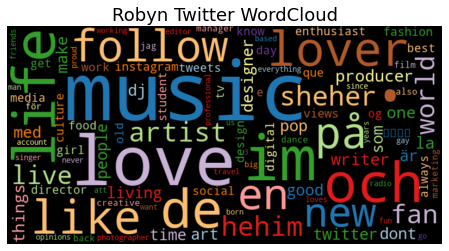

In [ ]:
plt.figure(figsize=(8,4))
robyn_twit_wd = count_words(clean_twit_data[clean_twit_data['artist']=='robyn'])
wordcloud(robyn_twit_wd['freq'], max_words=100)
plt.title('Robyn Twitter WordCloud', size = 18)

Q: What observations do you have about these (relatively straightforward) wordclouds?

**A:  The token 'love' is seen in all four corpora.** 